In [ ]:
###* This is Part 1 of X Code files for Week 3 Capital Bikeshare assignment
### Week 3 Project Capital Bikeshare Dataset Regression Preldiction Mode
##Load the dataset and preform Data Exploration and perform Feature Engineering

In [1]:
import pandas as pd 
from datetime import date, datetime
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier

In [198]:
wd = 'C:/Users/lisbo/OneDrive/AC Career/Spiced_Academy_DS/spiced_projects/cascabel-curve-student-code/week_03/data/'

df = pd.read_csv(wd + 'train.csv', index_col=0, header =0)
df = df.reset_index()



In [171]:
wd = 'C:/Users/lisbo/OneDrive/AC Career/Spiced_Academy_DS/spiced_projects/cascabel-curve-student-code/week_03/data/'

df_ploting = pd.read_csv(wd + 'train.csv', index_col=0, header =0)
df_ploting = df_ploting.reset_index()

In [ ]:
###DATA EXPLORATION OF THE DATASET

In [4]:
##Dataset exploration

print(df.describe()   );
print('\n')
print(df.isna().sum() );
print('\n')
df.info()
print('\n')

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [ ]:
###check Normality of the depdendent variable

In [169]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

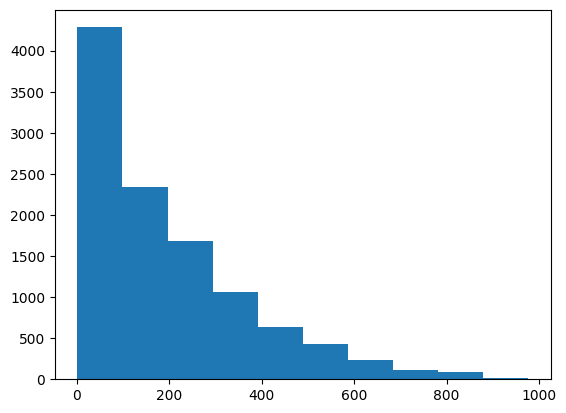

In [6]:

# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot
from numpy.random import randn 
from statsmodels.graphics.gofplots import qqplot

# histogram plot
pyplot.hist(df['count'])
pyplot.show()

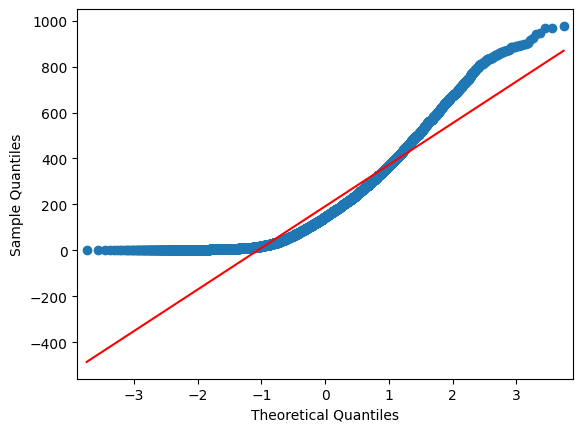

In [7]:
#qq plot of dependent variable 'count' as a visual check for Normality

from statsmodels.graphics.gofplots import qqplot

# QQ Plot
qqplot(df['count'], line='s')
pyplot.show()

C:\Users\lisbo\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='count', ylabel='Density'>

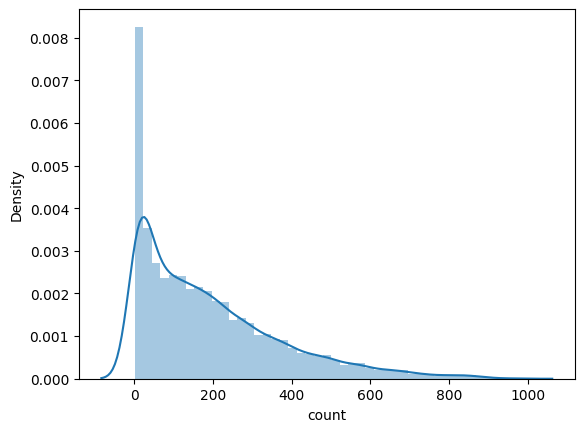

In [8]:
sns.distplot(df['count'])

In [ ]:
###Shapiro-Wilk Normality Test
#*The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was 
# drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In [9]:
# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
stat, p = shapiro(df['count'])     ###df['count']
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.878, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\lisbo\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
#function to return plots for the feature

import scipy.stats as stats
import pylab

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [199]:
#performing transformations on the 'count' dependent variable
from scipy.stats import shapiro
import scipy.stats as stats

df['count_Log']= np.log1p(df['count'])

##reciprocal transform
df['count_recip']=1/df['count']

##sqrt transform
df['count_sqrt']=np.sqrt(df['count'])

##expoential transform
df['count_exp']= df['count']**(1/1.2)

##Box Cox transform
df['count_Boxcox'],parameters=stats.boxcox(df['count'])

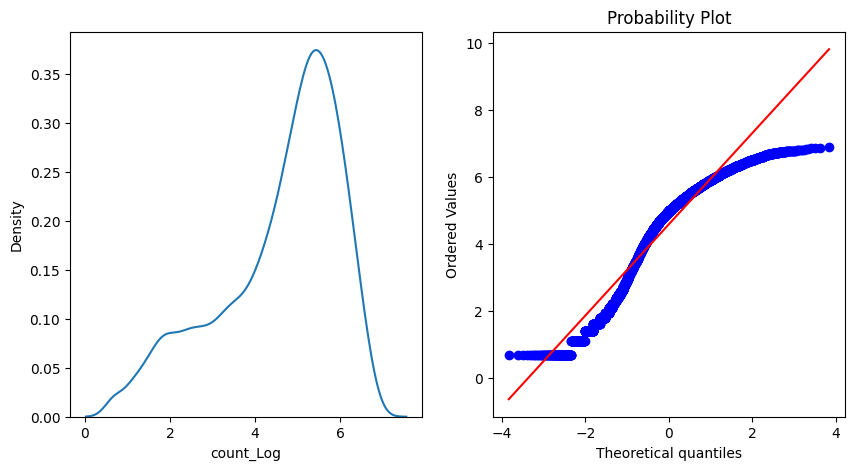

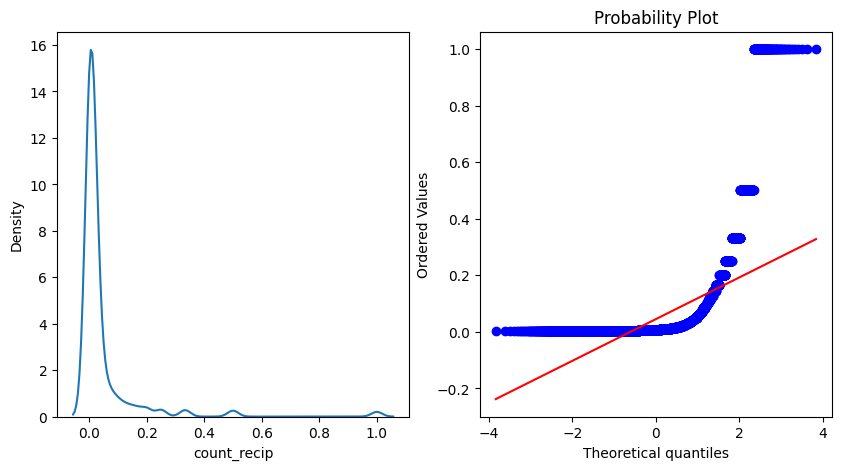

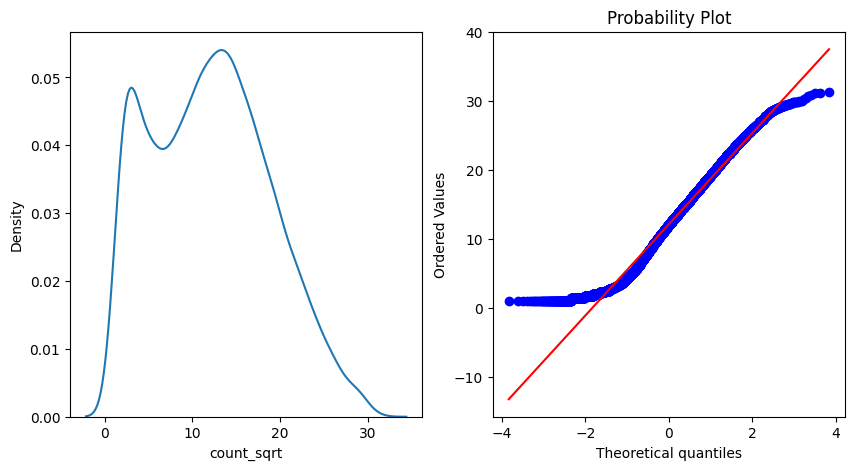

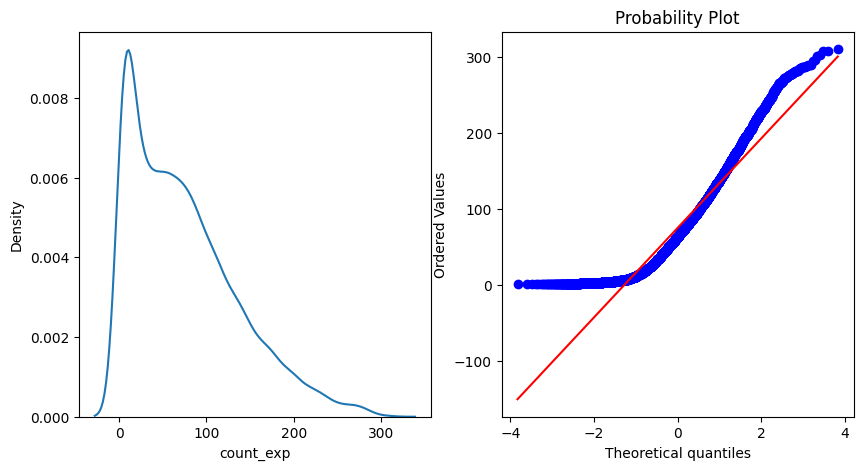

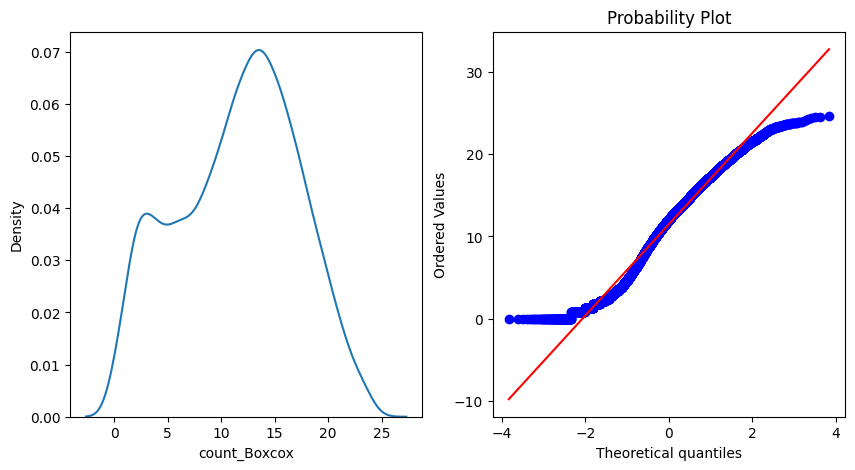

In [173]:
#plotting to check the transformation
normality(df,'count_Log')
normality(df,'count_recip')
normality(df,'count_sqrt')
normality(df,'count_exp')
normality(df,'count_Boxcox')


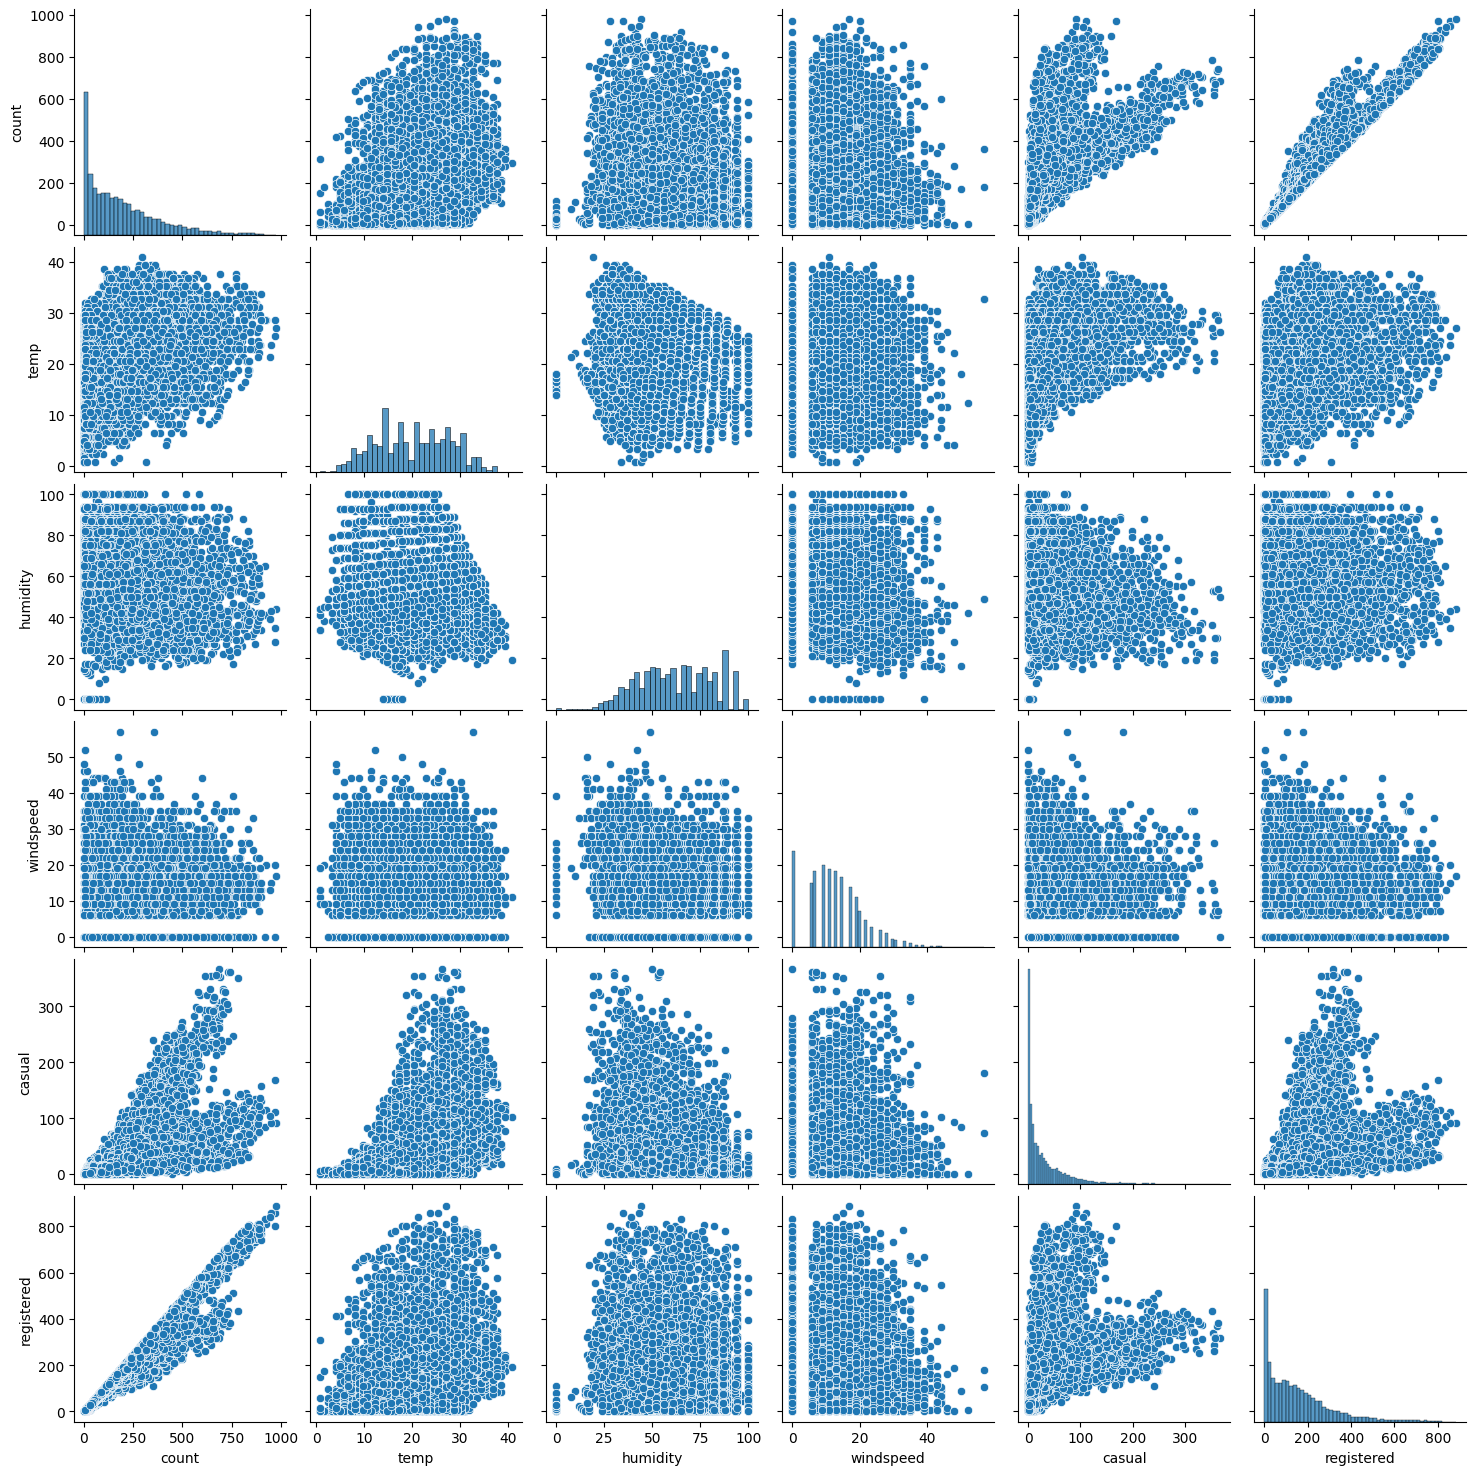

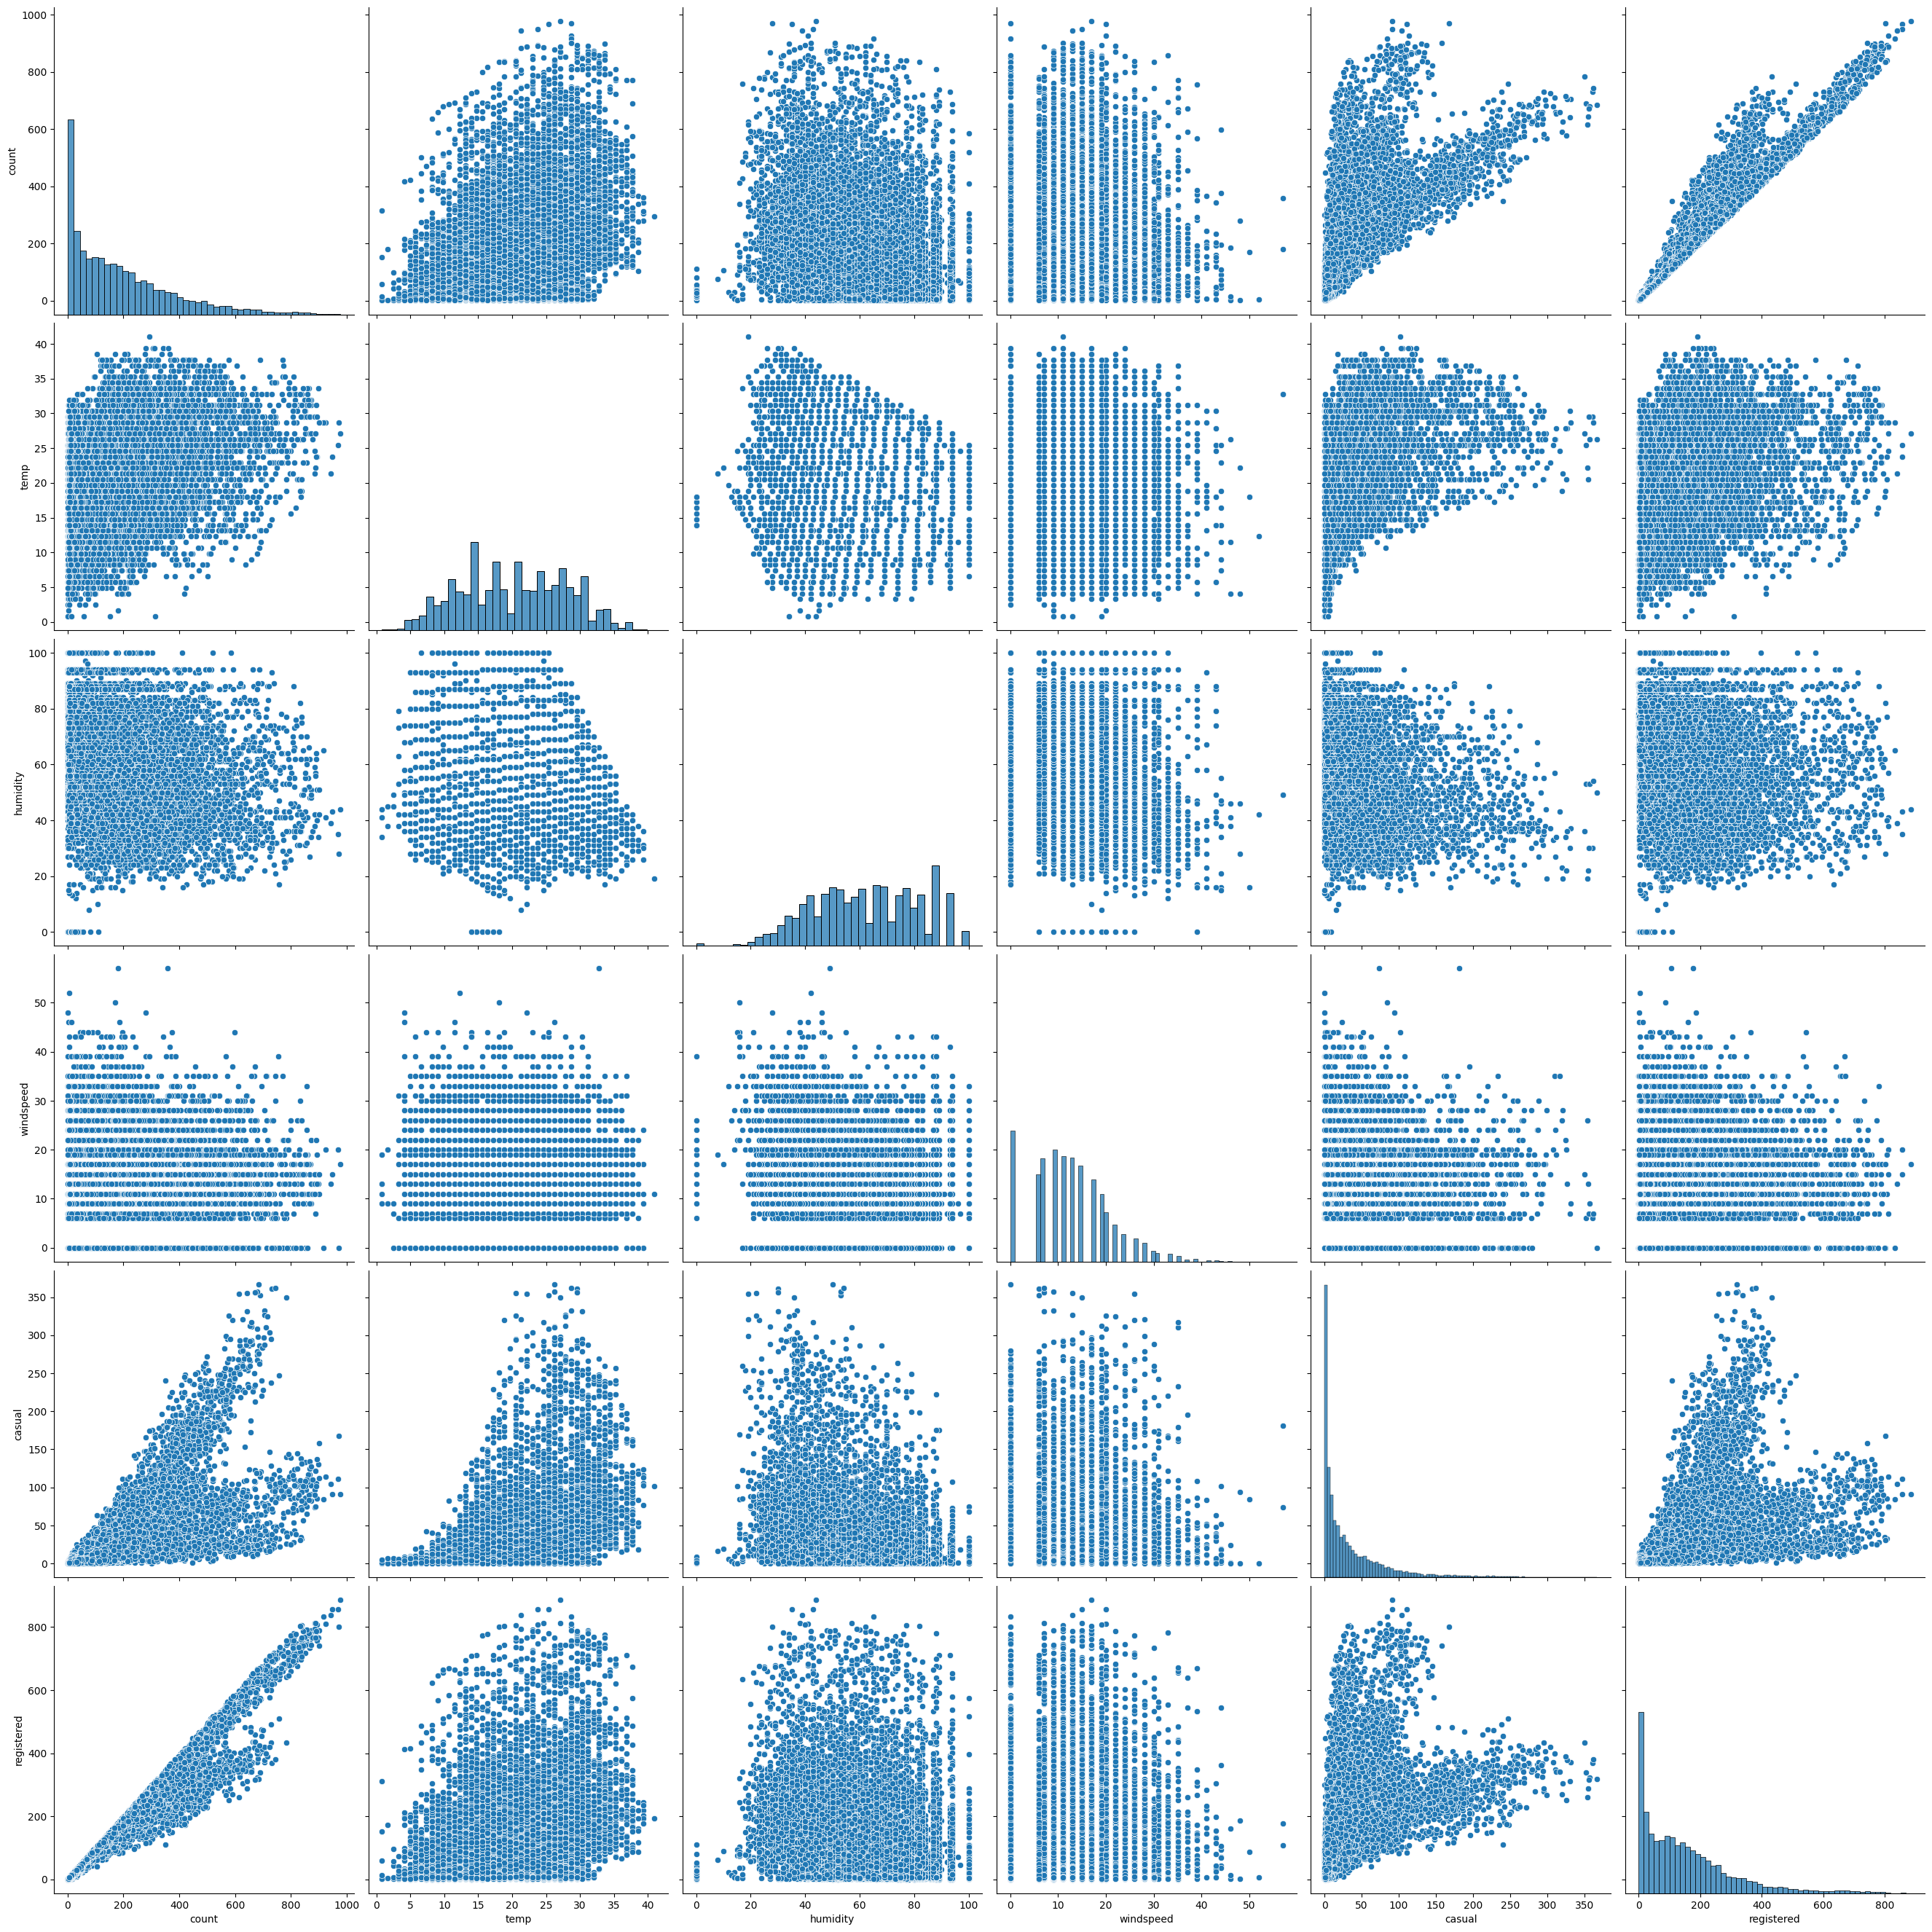

In [40]:
#plot the numeric variables against aach other to explore relationships
df_plot_num = df_ploting[['count', 'temp', 'humidity', 'windspeed', 'casual', 'registered']]

sns.pairplot(df_plot_num )
sns_plot = sns.pairplot(df_plot_num ,  height=4.5)
sns_plot
#fig = sns_plot.get_figure()
#fig.savefig("pairplot.png")



<AxesSubplot:>

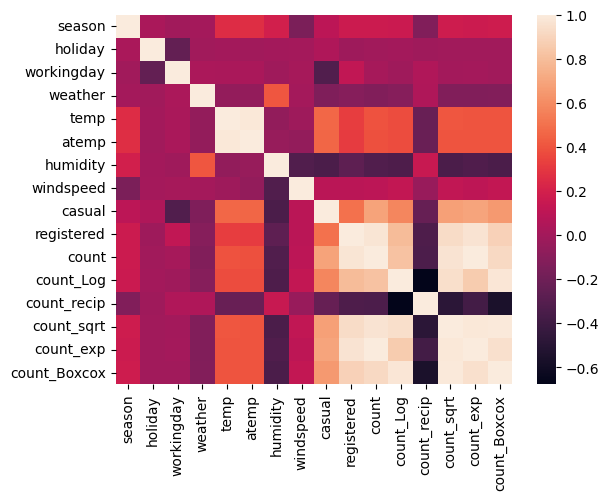

In [14]:
#correlation heatmap of dataset
sns.heatmap(df.corr())

In [ ]:
#this is a Profile report for Data Exloration of the entire dataset, it takes a few minutes to run

from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')


In [ ]:
###FEATURE ENGINEERING

In [200]:
#create new column based on the proportion of registered users
df['reg_prop'] = round(df['registered'] / df['count'], 2)
#create new column based on the proportion of non_registered users
df['non_reg_prop'] = round(df['casual'] / df['count'], 2)

In [201]:
#create new date columns based on the 'datetime' string column
df['datetime'] = pd.to_datetime(df['datetime'])

#year
from calendar import month_name

df['year'] = df['datetime'].dt.year
#Month
df['month'] = df['datetime'].dt.month
df['day_month'] = df['datetime'].dt.month_name()

#day
df['day'] = df['datetime'].dt.day
df['day_name'] = df['datetime'].dt.day_name()
#Hour
df['hour'] = df['datetime'].dt.hour

In [202]:
####Create Dummy variables to convert date variables into categorical Dummy variables

###create dummy for hour
##convert new age categories into dummy variables   
hour_dums = pd.get_dummies(df['hour']).rename(columns = lambda x:'hour_' + str(x))
df=df.join(hour_dums, lsuffix="_left", rsuffix="_right")


###create dummy for day
##convert new age categories into dummy variables   
day_dums = pd.get_dummies(df['day']).rename(columns = lambda x:'day_' + str(x))
df=df.join(day_dums, lsuffix="_left", rsuffix="_right")

###create dummy for day_name: 7 catergories 0 -6 for Monday through to Sunday 
dayname_dums = pd.get_dummies(df['day_name'])
df=df.join(dayname_dums, lsuffix="_left", rsuffix="_right")

###create dummy for month  
mon_dums = pd.get_dummies(df['month']).rename(columns = lambda x:'month_' + str(x))
df=df.join(mon_dums, lsuffix="_left", rsuffix="_right")


###create dummy for year
##convert new age categories into dummy variables   
year_dums = pd.get_dummies(df['year']).rename(columns = lambda x:'year_' + str(x))
df=df.join(year_dums, lsuffix="_left", rsuffix="_right")

In [203]:
#standardize the values in each of the 4 numerical continuous variable using sklearn

from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import StandardScaler


df[['temp_s', 'humidity_s','windspeed_s','reg_prop_s']] \
= StandardScaler().fit_transform(df[['temp', 'humidity','windspeed','reg_prop']])

##check means and standard deviations of Standardized variables
print (df['temp_s'].mean()),
print(df['windspeed_s'].mean()),
print (df['humidity_s'].mean() ),
print (df['reg_prop_s'].mean() ), 


print (df['temp_s'].std()),
print(df['windspeed_s'].std()),
print (df['humidity_s'].std() ),
print (df['reg_prop_s'].std() )

3.133019595488224e-16
-5.221699325813707e-17
1.1487738516790156e-16
4.803963379748611e-16
1.0000459337176697
1.0000459337176697
1.00004593371767
1.0000459337176697


###Train  Baseline Linear Regression Model

In [204]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'count_Log', 'count_recip', 'count_sqrt', 'count_exp', 'count_Boxcox',
       'reg_prop', 'non_reg_prop', 'year', 'month', 'day_month', 'day',
       'day_name', 'hour', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'Friday', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', '

In [206]:
X_ = df[['hour_0','hour_1', 'hour_2',       'hour_3',       'hour_4',
             'hour_5',       'hour_6',       'hour_7',       'hour_8',
             'hour_9',      'hour_10',      'hour_11',      'hour_12',
            'hour_13',      'hour_14',      'hour_15',      'hour_16',
            'hour_17',      'hour_18',      'hour_19',      'hour_20',
            'hour_21',      'hour_22',      'hour_23',
            'month_1',    'month_2',    'month_3',    'month_4','month_5',   
            'month_6',    'month_7',    'month_8',    'month_9', 'month_10',
            'month_11',   'month_12', 
            'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday',
            'year_2011','year_2012',
            'holiday', 'workingday', 'weather','humidity_s', 'windspeed_s',   'reg_prop_s', 'temp_s']]
y_ = df['count_Log']




In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#####core function for running Linear regressio models
def lr_model(x,y):

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.17, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    R2 = round(lm.score(X_test,y_test),3)
    
    return [lm, R2, X_train, X_test, y_train, y_test]

#lr_model(X,y)
#print mse score from regression model function and:
#pass X_train, X_test, y_train, y_test from functio into publicly available datasets
result = lr_model(X_,y_)

lm=  result[0]
X_train =  result[2]
X_test  =  result[3]
y_train =  result[4]
y_test  =  result[5]
print('R2 = ' + str(result[1]) )




R2 = 0.82


In [121]:
# print the intercept
print(lm.intercept_)

-46910970051641.66


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X_train.columns,columns=['Coefficient'])
coeff_df

In [123]:
#training score R2
lm.score(X_train,y_train)

0.8321270485347132

In [124]:
#test score R2)
# get the R2 score (note how much it improved compared than with the all dataset)

lm.score(X_test,y_test)

0.820162658206412

In [104]:
print(f'intercept={lm.intercept_}, slope= {lm.coef_}')

intercept=-214829343526322.0, slope= [ 4.18532005e+12  4.18532005e+12  4.18532005e+12  4.18532005e+12
  4.18532005e+12  4.18532005e+12  4.18532005e+12  4.18532005e+12
  4.18532005e+12  4.18532005e+12  4.18532005e+12  4.18532005e+12
  4.18532005e+12  4.18532005e+12  4.18532005e+12  4.18532005e+12
  4.18532005e+12  4.18532005e+12  4.18532005e+12  4.18532005e+12
  4.18532005e+12  4.18532005e+12  4.18532005e+12  4.18532005e+12
 -1.27389543e+13 -1.27389543e+13 -1.27389543e+13 -1.27389543e+13
 -1.27389543e+13 -1.27389543e+13 -1.27389543e+13 -1.27389543e+13
 -1.27389543e+13 -1.27389543e+13 -1.27389543e+13 -1.27389543e+13
  4.47591517e+13  4.47591517e+13  1.43240456e+14  1.43240456e+14
  4.47591517e+13  4.47591517e+13  4.47591517e+13  8.01425217e+13
  8.01425217e+13  9.84813045e+13  9.84813045e+13 -8.18115234e-01
 -2.92968750e-01 -1.51367188e-01 -3.90625000e-02  1.08300781e+00]


In [125]:
#generate predictions using test dataset
y_pred =lm.predict(X_test)

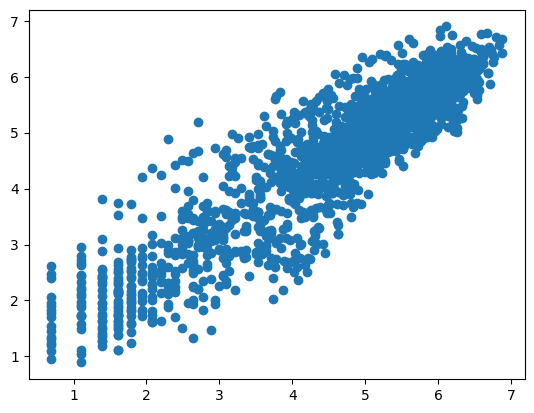

In [126]:
#Plot model: test actual values against predicts test Y values to see relationship
plt.scatter(y_test,y_pred)

C:\Users\lisbo\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


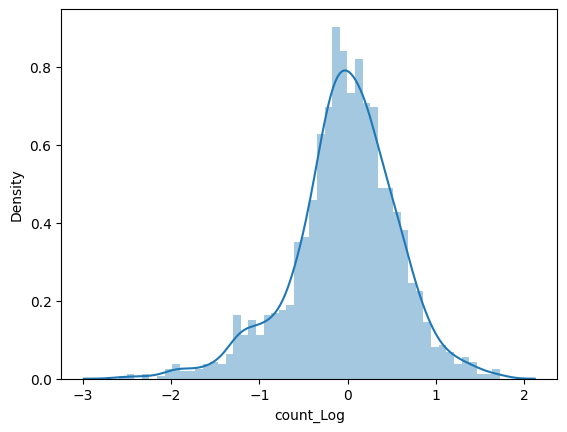

In [127]:
#Check assumption - Residuals of model are approx Normally distributed
#residual histogram
sns.distplot((y_test-y_pred),bins=50);

In [129]:
##basic metrics for basline regression model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,  y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4463523990561325
MSE: 0.3571573536657327
RMSE: 0.5976264332053366


In [130]:
##model parameters

print("Coefficients:", lm.coef_)
print("Intercept   :", lm.intercept_)

print("train score :", lm.score(X_train, y_train))
print("test score  :", lm.score(X_test, y_test))

Coefficients: [ 9.31847433e+11  9.31847433e+11  9.31847433e+11  9.31847433e+11
  9.31847433e+11  9.31847433e+11  9.31847433e+11  9.31847433e+11
  9.31847433e+11  9.31847433e+11  9.31847433e+11  9.31847433e+11
  9.31847433e+11  9.31847433e+11  9.31847433e+11  9.31847433e+11
  9.31847433e+11  9.31847433e+11  9.31847433e+11  9.31847433e+11
  9.31847433e+11  9.31847433e+11  9.31847433e+11  9.31847433e+11
 -2.24526903e+12 -2.24526903e+12 -2.24526903e+12 -2.24526903e+12
 -2.24526903e+12 -2.24526903e+12 -2.24526903e+12 -2.24526903e+12
 -2.24526903e+12 -2.24526903e+12 -2.24526903e+12 -2.24526903e+12
  9.37744501e+12  9.37744501e+12  3.08679818e+13  3.08679818e+13
  9.37744501e+12  9.37744501e+12  9.37744501e+12  1.73564099e+13
  1.73564099e+13  2.14905368e+13  2.14905368e+13 -1.89025879e-01
 -4.88281250e-02 -3.44238281e-02  1.26953125e-02  2.37060547e-01]
Intercept   : -46910970051641.66
train score : 0.8321270485347132
test score  : 0.820162658206412


In [ ]:
###plot model

import numpy as np
Xideal = np.linspace(-3.0, 3.0, 100)
yideal = lm.coef_[0] * Xideal + lm.intercept_

plt.figure()
plt.plot(X_train, y_train, 'bs', label="train")
plt.plot(X_test, y_test, 'ro', label="test")
plt.plot(Xideal, yideal, 'k-', label="fitted")
plt.legend()
plt.savefig('linear.png')
plt.show()


In [ ]:
##look for colinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(X_train)
pd.Series([variance_inflation_factor(X_train.values, i)
           for i in range(X_train.shape[1])],
          index=X_train.columns)

In [208]:
mod_df = df[['count_Log', 'hour_0','hour_1', 'hour_2',       'hour_3',       'hour_4',
             'hour_5',       'hour_6',       'hour_7',       'hour_8',
             'hour_9',      'hour_10',      'hour_11',      'hour_12',
            'hour_13',      'hour_14',      'hour_15',      'hour_16',
            'hour_17',      'hour_18',      'hour_19',      'hour_20',
            'hour_21',      'hour_22',      'hour_23',
            'month_1',    'month_2',    'month_3',    'month_4','month_5',   
            'month_6',    'month_7',    'month_8',    'month_9', 'month_10',
            'month_11',   'month_12', 
            'year_2011',  'year_2012',
            'holiday', 'workingday', 'weather','humidity_s', 'windspeed_s',  'season', 'reg_prop_s', 'temp_s']]


In [ ]:
##run OLS regression to look at significant variables in model

import pandas as pd
import statsmodels.formula.api as sm


if __name__ == "__main__":


    # Fit all data
    fit = sm.ols(formula="count_Log ~  hour_0 +hour_1 + hour_2 +   hour_3 + hour_4 +  hour_5 +    hour_6 +   hour_7 +  hour_8 + hour_9 +  hour_10 + hour_11 +      hour_12 + hour_13 +      hour_14 +      hour_15 +      hour_16 + hour_17 +   hour_18 + hour_19 +  hour_20 + hour_21 +   hour_22 +  hour_23 +   holiday + workingday + weather +  humidity_s + windspeed_s +  season + reg_prop_s + temp_s "
    , data=mod_df ).fit()
    print(fit.summary())

# hour_0 +hour_1 + hour_2 +   hour_3 + hour_4 +  hour_5 +    hour_6 +   hour_7 +  hour_8 + hour_9 +  hour_10 + hour_11 +      hour_12 + hour_13 +      hour_14 +      hour_15 +      hour_16 + hour_17 +   hour_18 + hour_19 +  hour_20 + hour_21 +   hour_22 +  hour_23
# #+ month_1 + month_2 +    month_3 +    month_4 +month_5 +    month_6 +    month_7 +    month_8 +    month_9 + month_10 + month_11 +   month_12 + 
#year_2011 +  year_2012

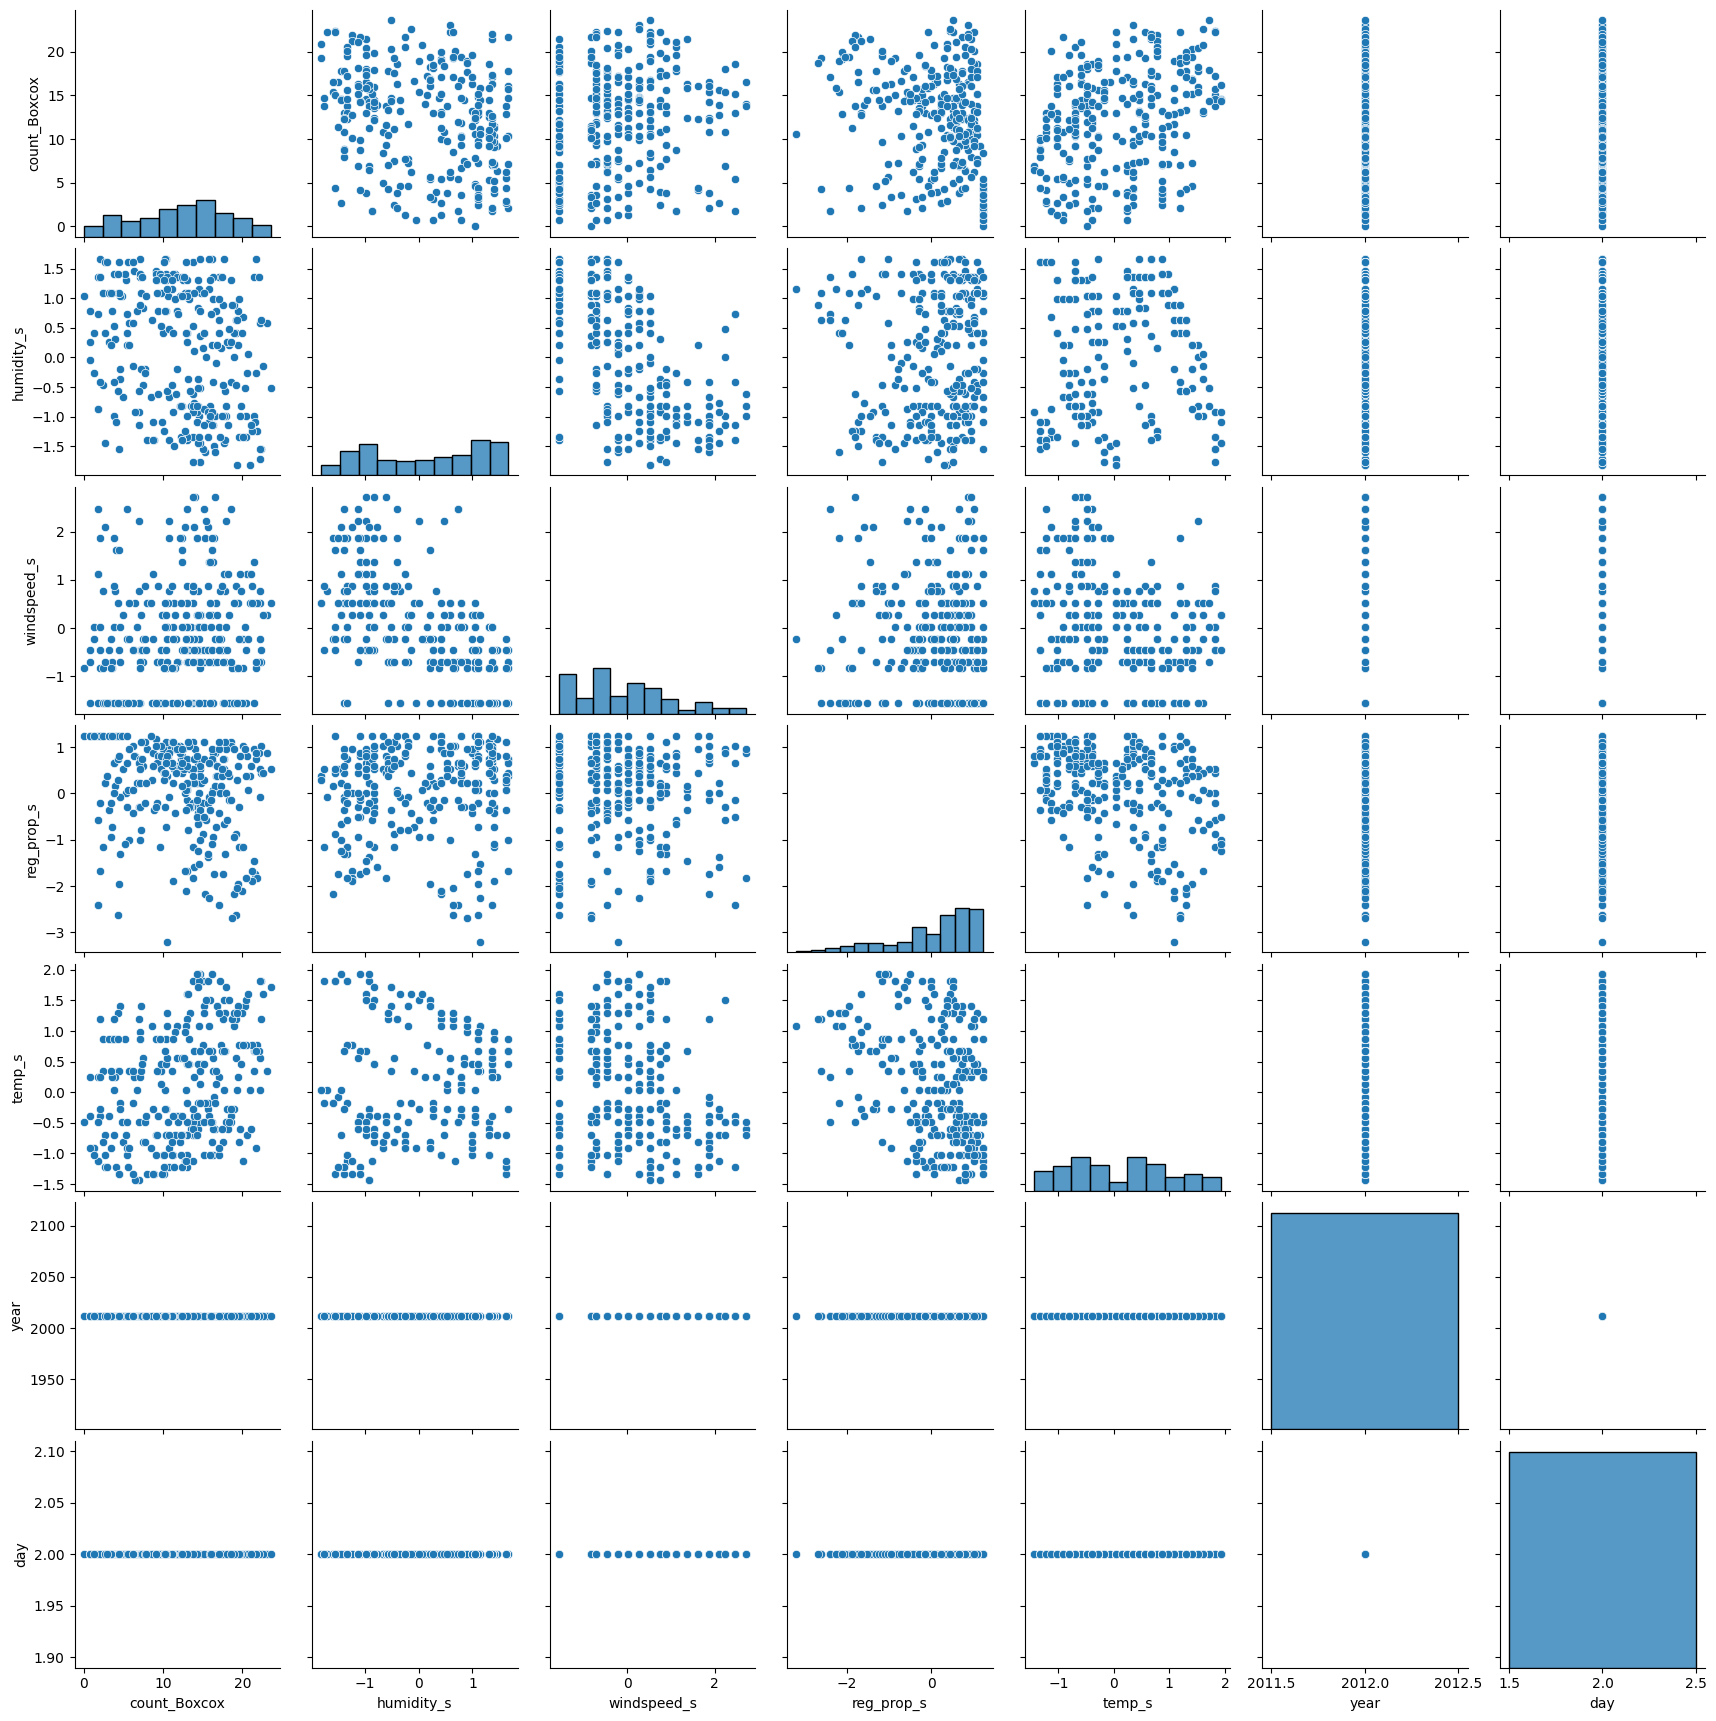

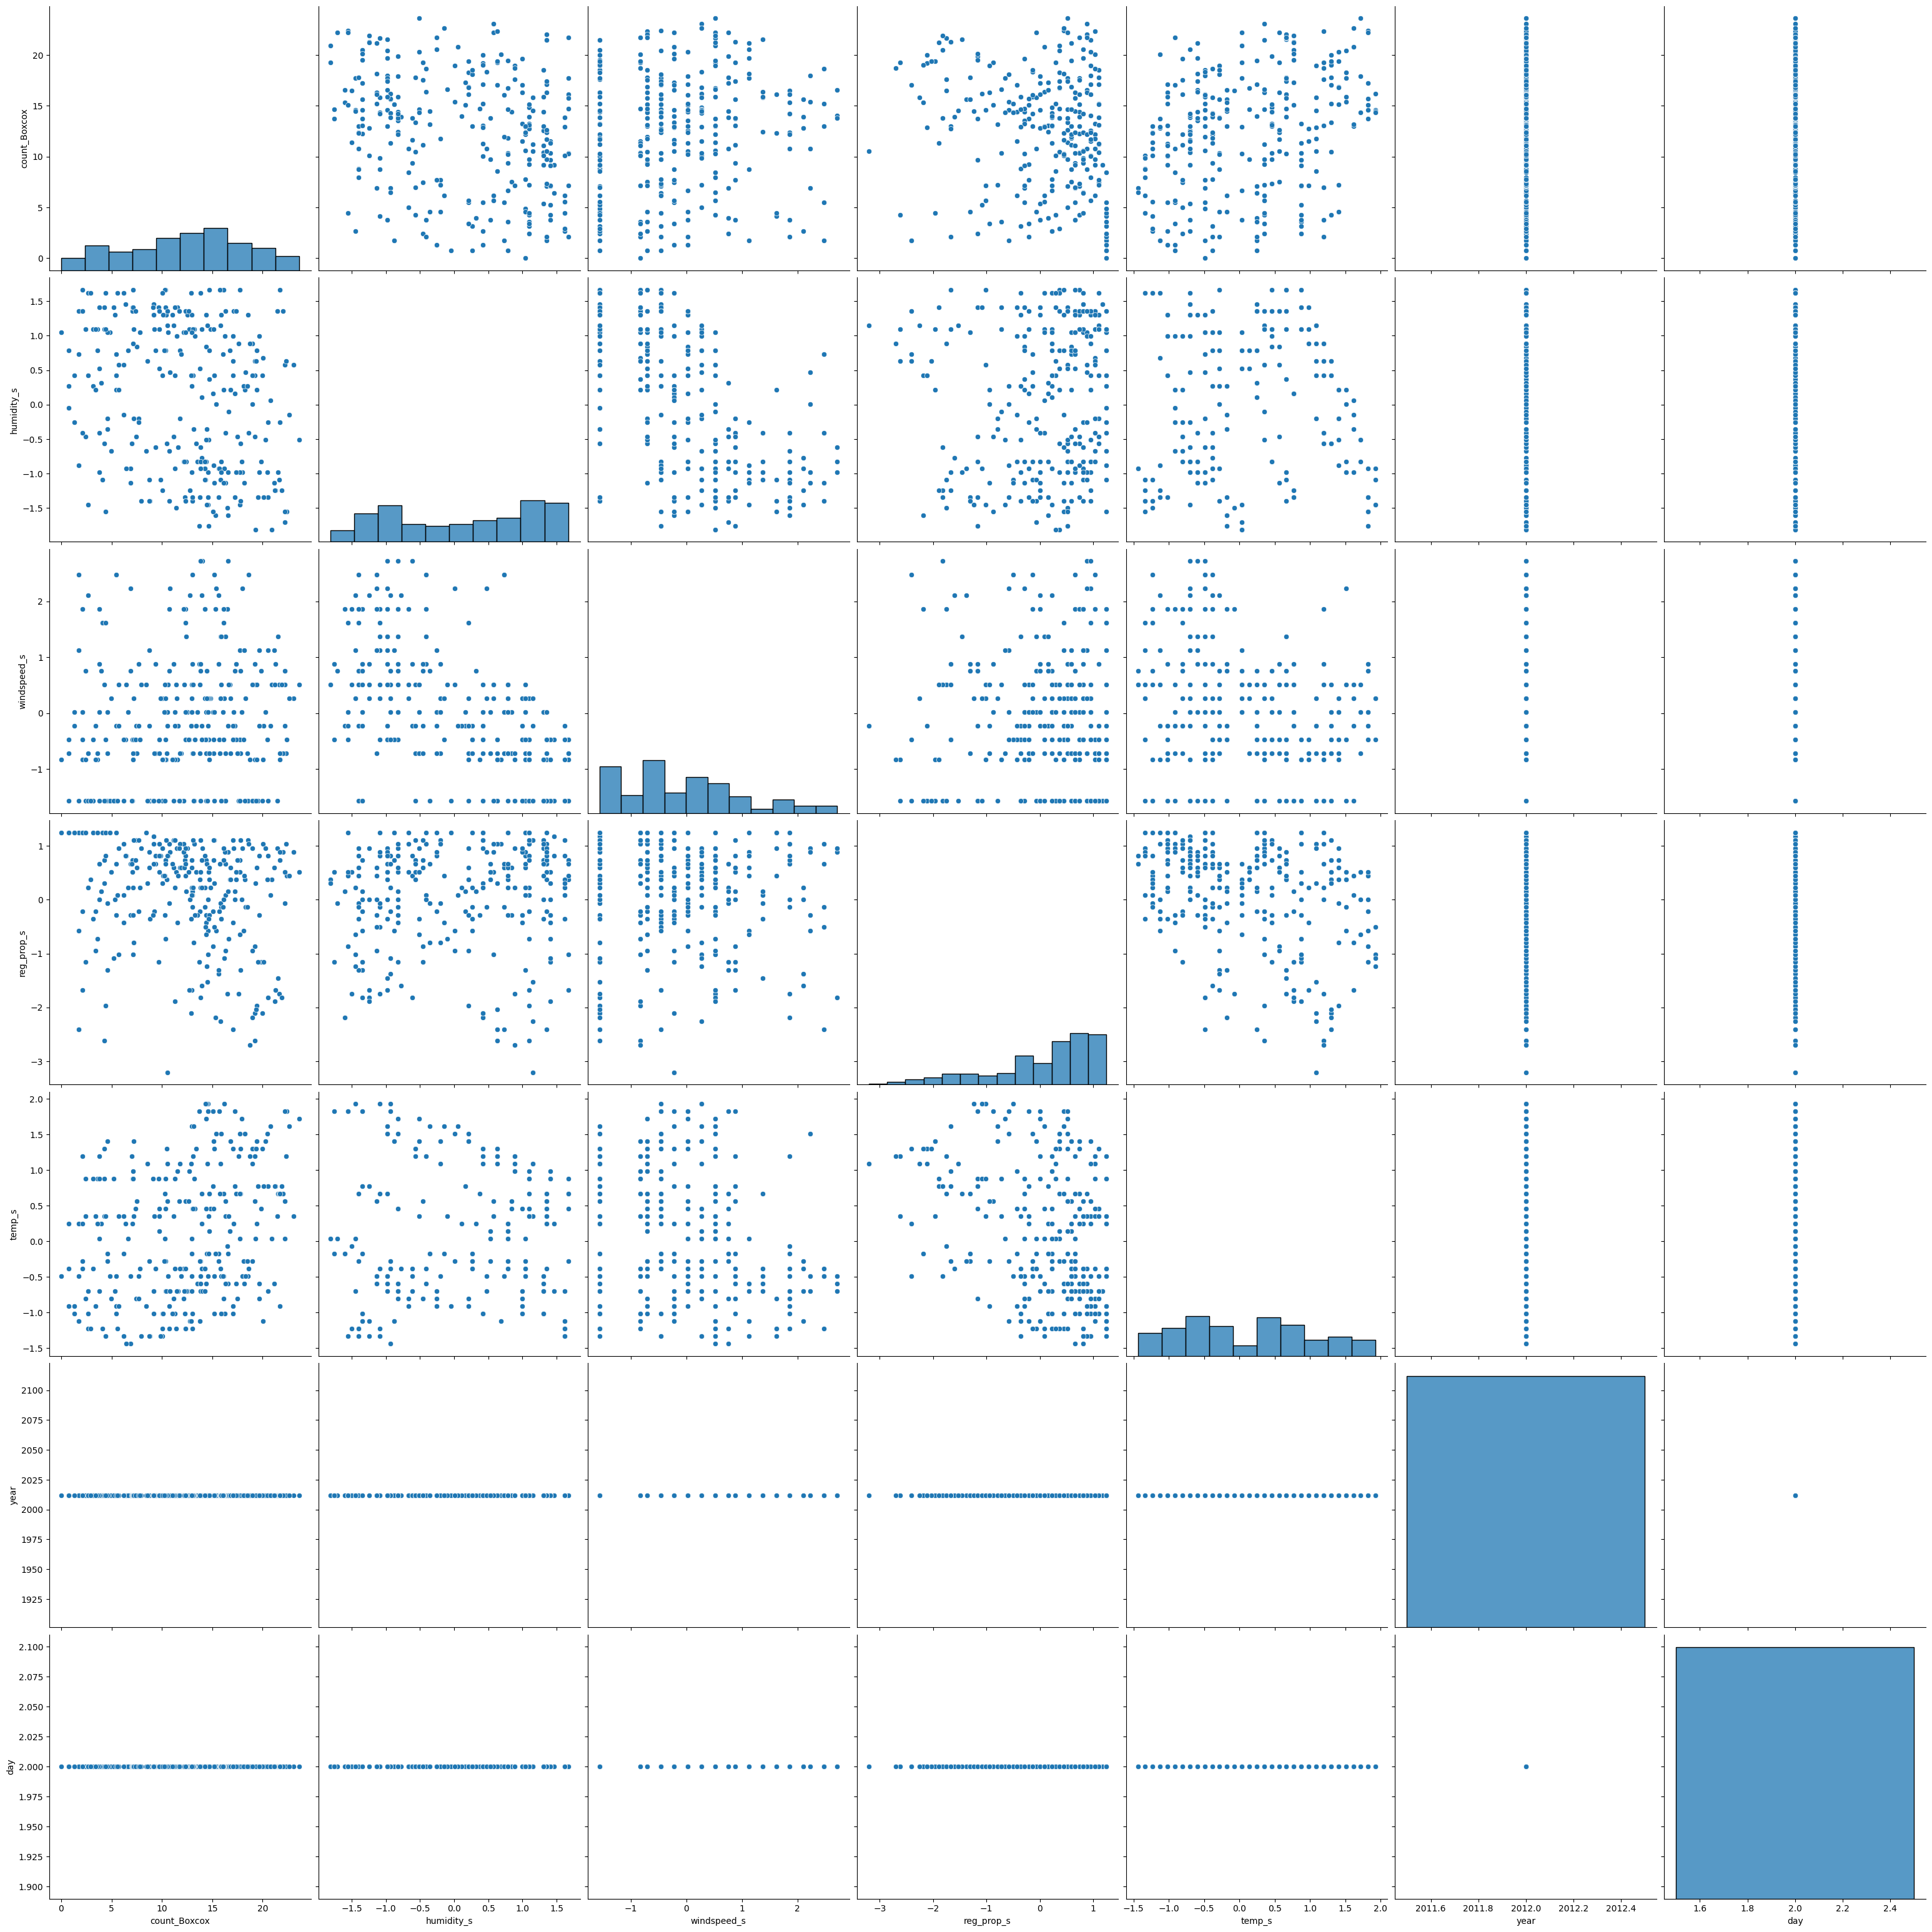

In [39]:
#Invesigate using polynomial terms in the model by creating simple model with 4 numerical variables

df_plot_num2 = df[['count_Boxcox', 'humidity_s', 'windspeed_s', 'reg_prop_s', 'temp_s', 'year','day']]
df_plot_num2 = df_plot_num2.loc[(df_plot_num2['year'] == 2012) & (df_plot_num2['day'] ==2  )]

#df_filtered = df.loc[(df['C'] == 1)| (df['C'] == 2)]

sns.pairplot(df_plot_num2 )
sns_plot = sns.pairplot(df_plot_num2 ,  height=4.5)
sns_plot

#fig = sns_plot.get_figure()
#fig.savefig("pairplot.png")
#sns.plot(sns_plot)

####Explore the univaraite relationhips between the numeric independent variables and counts

###First plot simple model for only temp, humidity, windspeed and registered proportions for non transformed variables

In [209]:
X = df[['humidity_s', 'windspeed_s',   'reg_prop_s', 'temp_s']]
y = df['count_Log']

#'humidity', 'windspeed',   'reg_prop', 'temp'

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(X,y)

ypreds=lm2.predict(X)



In [210]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, ypreds))
print('MSE:', metrics.mean_squared_error(y, ypreds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, ypreds)))

MAE: 0.968104663162818
MSE: 1.527258334466586
RMSE: 1.2358229381535957


###second plot univarate models using only temp, humidity, windspeed and registered proportions for polyomial transformed values and compare the mse compared to model with non transformed varibales

In [211]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


polynomial_features= PolynomialFeatures(degree=2, interaction_only=False)
x_poly = polynomial_features.fit_transform(X)
#x_testpoly = polynomial_features.fit_transform(X)


lm3= LinearRegression()
lm3.fit(x_poly, y)
y_poly_pred = lm3.predict(x_poly)

In [212]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y, y_poly_pred ))
print('MSE:', metrics.mean_squared_error(y, y_poly_pred ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_poly_pred )))

MAE: 0.9292370415229781
MSE: 1.4218825917174154
RMSE: 1.1924271850798334


###Create the Polynomial and Interaction variables and join it back into the main model dataset

In [213]:
###change the column  names of he transformed numeric variables into meaningful names

cl = df[['humidity_s', 'windspeed_s',   'reg_prop_s', 'temp_s']]
ml = PolynomialFeatures(degree=2, interaction_only=False)
ml.fit_transform(cl)
colnmames  = list(ml.get_feature_names(['humidity_s', 'windspeed_s',   'reg_prop_s', 'temp_s']) )


#m.get_feature_names(['a','b'])
#change columns name of x_poly dataframe to refelct meaningful titles from the colnames List

x_poly=pd.DataFrame(x_poly, columns=colnmames)
print(x_poly.columns)
x_poly = x_poly.reset_index()



Index(['1', 'humidity_s', 'windspeed_s', 'reg_prop_s', 'temp_s',
       'humidity_s^2', 'humidity_s windspeed_s', 'humidity_s reg_prop_s',
       'humidity_s temp_s', 'windspeed_s^2', 'windspeed_s reg_prop_s',
       'windspeed_s temp_s', 'reg_prop_s^2', 'reg_prop_s temp_s', 'temp_s^2'],
      dtype='object')


C:\Users\lisbo\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [214]:
####Join the transformed variables back onto the main dataframe to be used to run final model

from operator import index
df=  pd.merge(df, x_poly, left_index=True, right_index=True, how='right')


In [215]:
##clean up columns in df dataframe

df.rename(columns = {'humidity_s_x':'humidity_s', 'windspeed_s_x':'windspeed_s', \
 'reg_prop_s_x':'reg_prop_s',  'temp_s_x':'temp_s'}, inplace = True)

df.drop(['humidity_s_y', 'temp_s_y', 'windspeed_s_y','reg_prop_s_y'], axis=1, inplace=True)

In [216]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual',
       ...
       'humidity_s^2', 'humidity_s windspeed_s', 'humidity_s reg_prop_s',
       'humidity_s temp_s', 'windspeed_s^2', 'windspeed_s reg_prop_s',
       'windspeed_s temp_s', 'reg_prop_s^2', 'reg_prop_s temp_s', 'temp_s^2'],
      dtype='object', length=105)

In [ ]:
#y_poly_pred=lm3.predict(X)
import operator

plt.scatter(X,y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
plt.plot(X, y_poly_pred, color='r')
plt.show()

In [217]:
#####interaction and Polynomial terms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
df.columns

In [218]:
X = df[['hour_0','hour_1', 'hour_2',       'hour_3',       'hour_4',
             'hour_5',       'hour_6',       'hour_7',       'hour_8',
             'hour_9',      'hour_10',      'hour_11',      'hour_12',
            'hour_13',      'hour_14',      'hour_15',      'hour_16',
            'hour_17',      'hour_18',      'hour_19',      'hour_20',
            'hour_21',      'hour_22',      'hour_23',
            'month_1',    'month_2',    'month_3',    'month_4','month_5',   
            'month_6',    'month_7',    'month_8',    'month_9', 'month_10',
            'month_11',   'month_12', 
            'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday','Wednesday',
            'year_2011','year_2012',
            'holiday', 'workingday', 'weather','humidity', 'windspeed',  
            'reg_prop_s', 'temp_s',
            'humidity_s^2', 'humidity_s temp_s', 'windspeed_s^2', 'windspeed_s reg_prop_s',
            'windspeed_s temp_s', 'reg_prop_s^2', 'reg_prop_s temp_s', 'temp_s^2'  ]]
y = df['count_Log']


In [219]:
#####Train model using the new polynomial and interaction terms for temp, humidity, windspeed and reg_prop

result = lr_model(X,y)

lm3=  result[0]
X_train =  result[2]
X_test  =  result[3]
y_train =  result[4]
y_test  =  result[5]

y_pred=lm3.predict(X_test)
print('R2 = ' + str(result[1]) )


R2 = 0.827


In [220]:
#Cross Validation of Linear Regression model using the Polynomials and interactions terms Model:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm3, X_train, y_train, cv=5, scoring = "r2")

print("R2 Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

R2 Scores: [0.84562994 0.8284638  0.84265804 0.82956949 0.82783215]
Mean: 0.8348306853968003
Standard Deviation: 0.007682294339348939


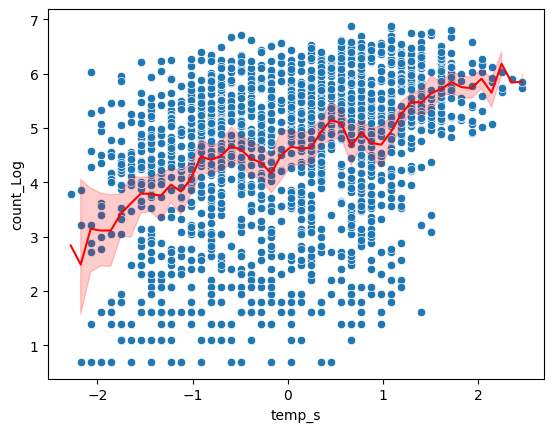

In [223]:
##Plot a single predicted variable against its actual value to observe model fit
sns.scatterplot(x=X_test['temp_s'], y=y_test)
sns.lineplot(x=X_test["temp_s"], y=y_pred, color="red");

In [224]:


from sklearn.model_selection import cross_validate
cv = cross_validate(
    estimator=lm3, # model
    X=X_train,        # Input features
    y=y_train,        # target data
    cv=5,            # no. of datasets in cross-validation
    scoring="neg_mean_squared_error", # Evaluation metric (MSE)
    return_train_score=True # return both cv-training and cv-test (validation) scores
)

In [225]:

cv["train_score"]


array([-0.33308688, -0.32183513, -0.33364819, -0.32376442, -0.3256735 ])

###Regulaization of the model using Ridge Regression

In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge




In [235]:

hyperparams = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1]
}


rr = Ridge(alpha=hyperparams)

#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

g = GridSearchCV(rr, hyperparams, cv=5, scoring='r2')
g.fit(X_train, y_train)

ypred = g.predict(X_test)

In [228]:
g.best_params_

{'alpha': 0.3}

In [229]:
rr = Ridge()
g = GridSearchCV(rr, hyperparams, cv=5, scoring='r2')
g.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 1]},
             scoring='r2')

In [230]:
cv_df = pd.DataFrame(g.cv_results_)
cv_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.030316      0.005593         0.007779        0.004651        0.01   
1       0.026328      0.003919         0.005586        0.001353         0.1   
2       0.025133      0.005549         0.005585        0.001494         0.2   
3       0.023536      0.002863         0.005187        0.001596         0.3   
4       0.020743      0.002707         0.004989        0.001262         0.5   
5       0.023336      0.003488         0.004788        0.000747         0.7   
6       0.035606      0.011488         0.007184        0.002984           1   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.01}           0.845629           0.828463           0.842659   
1   {'alpha': 0.1}           0.845633           0.828459           0.842672   
2   {'alpha': 0.2}           0.845636           0.828454           0.842686   
3   {'alpha': 0.3}           0.845640           0.828449           0.842700   
4   {'alpha': 0.5}           0.845646           0.828439           0.842726   
5   {'alpha': 0.7}           0.845652           0.828428           0.842751   
6     {'alpha': 1}           0.845658           0.828410           0.842787   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.829566           0.827834         0.834830        0.007683   
1           0.829552           0.827838         0.834831        0.007688   
2           0.829537           0.827843         0.834831        0.007694   
3           0.829521           0.827847         0.834831        0.007700   
4           0.829489           0.827855         0.834831        0.007712   
5           0.829456           0.827862         0.834830        0.007724   
6           0.829405           0.827870         0.834826        0.007741   

   rank_test_score  
0                5  
1                4  
2                2  
3                1  
4                3  
5                6  
6                7

In [231]:
rf_best = g.best_estimator_
rf_best

Ridge(alpha=0.3)

In [232]:
rf_best.fit(X_train, y_train)

Ridge(alpha=0.3)

In [233]:
rf_best.predict(X_test)

array([5.9275574 , 5.68454778, 4.50406924, ..., 2.1791618 , 4.34418411,
       5.33584477])

In [234]:
f'Grid search training score: {rf_best.score(X_train, y_train)}   Grid search testing score {rf_best.score(X_test, y_test)}'

'Grid search training score: 0.8375563985010478   Grid search testing score 0.8273659267024235'

In [238]:
ypred_notlog = np.exp(ypred )-1

from sklearn.metrics import mean_squared_log_error

np.sqrt(mean_squared_log_error(y_test, ypred_notlog))



3.105650861671205